In [41]:
import os
import sys
from importlib import reload

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.insert(0,module_path)

import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
alt.renderers.enable('notebook')
from IPython.display import display

import library_regulons
reload(library_regulons)
from library_regulons import *
import jupyter_functions as jf
importlib.reload(jf)
import jupyter_functions as jf


In [6]:
dataPath=module_path+'/data_expression/'
genes = pd.read_csv(dataPath + 'mergedGenes_RPKUM.tsv', sep='\t', index_col=0)
conditions = pd.read_csv(dataPath + 'conditions_mergedGenes.tsv', sep='\t', index_col=None)

In [38]:
neighbour_calculator = NeighbourCalculator(genes,conditions=conditions,conditions_names_column='Measurment')

In [9]:
SCALE = 'mean0std1'
LOG = True
NHUBS = 100
NEIGH_HUBS=6

In [ ]:
neighbour_calculator_all = NeighbourCalculator(genes=genes)
neigh_all, sims_all = neighbour_calculator_all.neighbours(n_neighbours=NEIGH_HUBS, inverse=False, scale=SCALE, log=LOG,
                                                          return_neigh_dist=True)
hubs_all = NeighbourCalculator.find_hubs(similarities=sims_all, n_hubs=NHUBS)

## Select N of neighbours for hub genes
Check how many neighbour pairs above certain threshold are retained for hub genes at different N of nearest neighbours. Check how many unique genes are within these.

In [ ]:
retained_stats=[]
for neighbours in [20,50,100,200,300]:
    print('neighbours',neighbours)
    pairs = neighbour_calculator_all.neighbours(n_neighbours=neighbours, inverse=False, scale=SCALE,
                                                            log=LOG,
                                                            return_neigh_dist=False, genes_query_names=hubs_all)
    for threshold in [0.8,0.85,0.89,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]:
        retained= NeighbourCalculator.filter_similarities(results=pairs, similarity_threshold=threshold)
        n_genes = len(set(gene for pair in retained for gene in pair))
        retained_stats.append({'kNN':neighbours,'min similaririty':threshold,'N retained':len(retained),
                               'N genes':n_genes})
retained_stats=pd.DataFrame(retained_stats)   

In [28]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(retained_stats)

,kNN,min similaririty,N retained,N genes
0,20,0.80,1444,341
1,20,0.85,1444,341
2,20,0.89,1443,341
3,20,0.90,1431,340
4,20,0.91,1410,337
5,20,0.92,1373,331
6,20,0.93,1295,316
7,20,0.94,1212,299
8,20,0.95,1070,281
9,20,0.96,744,234


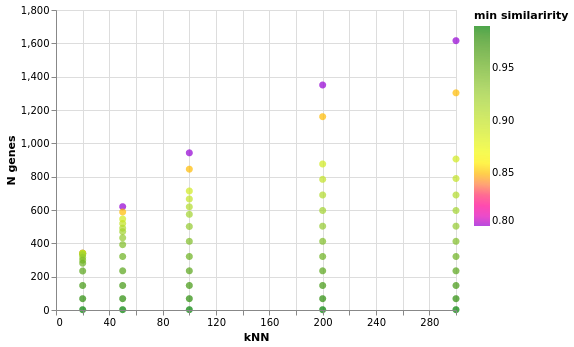

In [30]:
alt.Chart(pd.DataFrame(retained_stats)).mark_circle().encode(x='kNN',y='N genes', 
                                   color=alt.Color('min similaririty',scale=
                                                   alt.Scale(range=['darkviolet','yellow','yellowgreen','green']))
                                  ).configure_circle(size=50)

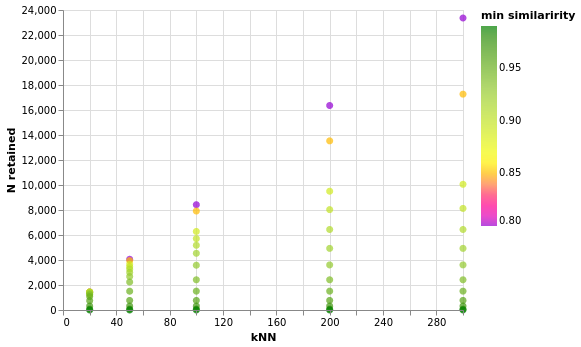

In [31]:
alt.Chart(pd.DataFrame(retained_stats)).mark_circle().encode(x='kNN',y='N retained', 
                                   color=alt.Color('min similaririty',scale=
                                                   alt.Scale(range=['darkviolet','yellow','yellowgreen','green']))
                                  ).configure_circle(size=50)

## Similarity threshold

In [35]:
available_replicates=list(set(conditions.loc[:,'Replicate']))

In [42]:
subset1,subset2=jf.sample_from_list(available_replicates,sample1=24,sample2=24)

In [47]:
result=neighbour_calculator.compare_thresholds(neighbours_n=200, inverse=False,
                           scale=SCALE, use_log=LOG, thresholds=[0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99], 
                                                            filter_column='Replicate', 
                                        filter_column_values1=subset1,
                           filter_column_values2=subset2,genes_query_names=hubs_all)

In [48]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(result)

,N neighbours,inverse,use_log,scale,threshold,N pairs1,N pairs2,N genes1,N genes2,F value genes,F value pairs
0,200,False,True,mean0std1,0.90,8431,8589,815,849,0.846154,0.728085
1,200,False,True,mean0std1,0.91,7038,6864,734,738,0.845109,0.714430
2,200,False,True,mean0std1,0.92,5384,5315,640,622,0.847861,0.702496
3,200,False,True,mean0std1,0.93,3900,4000,537,524,0.855796,0.677722
4,200,False,True,mean0std1,0.94,2660,2791,445,422,0.830450,0.650523
5,200,False,True,mean0std1,0.95,1607,1825,335,334,0.843049,0.635781
6,200,False,True,mean0std1,0.96,847,999,263,242,0.815842,0.572048
7,200,False,True,mean0std1,0.97,328,459,169,163,0.795181,0.559085
8,200,False,True,mean0std1,0.98,66,134,74,81,0.606452,0.380000
9,200,False,True,mean0std1,0.99,3,2,5,4,0.222222,NaN


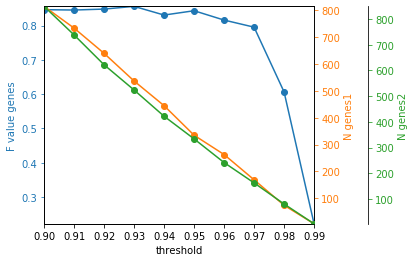

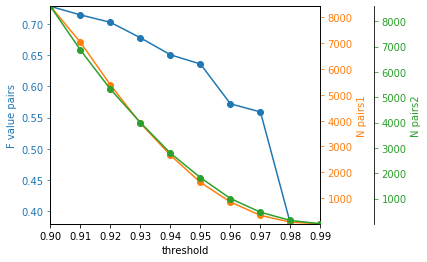

In [61]:
pandas_multi_y_plot(result, 'threshold', ['F value genes', 'N genes1','N genes2'])
pandas_multi_y_plot(result, 'threshold', ['F value pairs', 'N pairs1','N pairs2'])

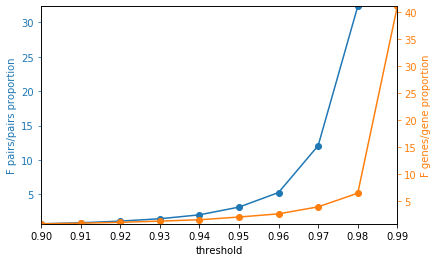

In [71]:
avg_genes=(result[['N genes1','N genes2']].sum(axis=1)/2)
gene_proportions=avg_genes/avg_genes.max()
result['F genes/gene proportion']=result['F value genes']/gene_proportions

avg_pairs=(result[['N pairs1','N pairs2']].sum(axis=1)/2)
pair_proportions=avg_pairs/avg_pairs.max()
result['F pairs/pairs proportion']=result['F value pairs']/pair_proportions
pandas_multi_y_plot(result, 'threshold', ['F pairs/pairs proportion','F genes/gene proportion'])